In [1]:
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

from itertools import product
from matplotlib.colors import ListedColormap
from tqdm import tqdm
from typing import Literal

from matplotlib import gridspec
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
import pickle 

from pscapes import ProteinLandscape



In [2]:
models = ['linear', 'gb', 'rf', 'mlp', 'cnn', 'ulstm', 'blstm', 'transformer']

In [3]:
#load GB1 data 
with open('../results/extrapolation_results_GB1.pkl', 'rb') as file: 
    extrap_results_GB1 = pickle.load(file) 
pearson_results_GB1 = np.zeros((8, 4, 4, 4))  
mse_results_GB1 = np.zeros((8, 4, 4, 4))  
r2_results_GB1 = np.zeros((8, 4, 4, 4))  

In [4]:
# load GB1 data
for model_index, model in enumerate(models): 
    for repl_index, replicate in enumerate(extrap_results_GB1[model]['gb1'].keys()): 
        for train_index, train_distance in enumerate(extrap_results_GB1[model]['gb1'][replicate].keys()):
            for test_index, test_distance in enumerate(list(extrap_results_GB1[model]['gb1'][replicate][train_distance][0].keys())[1:]):
                pearson_results_GB1[model_index][repl_index][train_index][test_index] = extrap_results_GB1[model]['gb1'][replicate][train_distance][0][test_distance]['pearson_r']
                mse_results_GB1[model_index][repl_index][train_index][test_index] = extrap_results_GB1[model]['gb1'][replicate][train_distance][0][test_distance]['mse_loss']
                r2_results_GB1[model_index][repl_index][train_index][test_index] = extrap_results_GB1[model]['gb1'][replicate][train_distance][0][test_distance]['r2']
                    


In [5]:
pearson_results_GB1_mean = np.nanmean(pearson_results_GB1, axis=1)
mse_results_gb1_mean = np.nanmean(mse_results_GB1, axis=1)
r2_results_gb1_mean = np.nanmean(r2_results_GB1, axis=1)

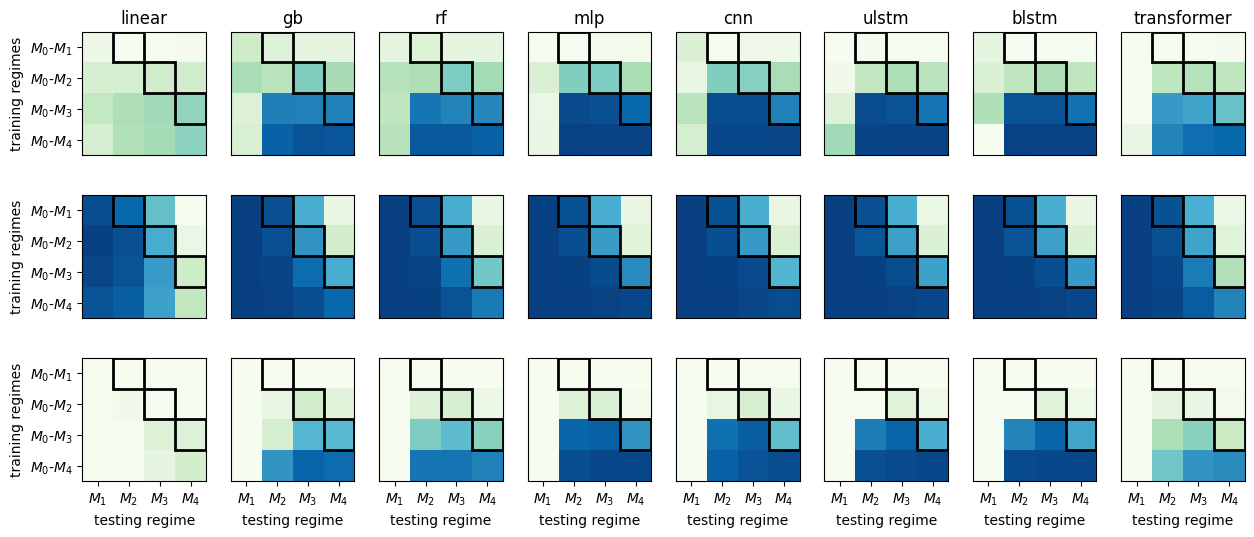

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=8, figsize=(15,6))

n=0
for rowi, row in enumerate(ax):
    for ind, axis in enumerate(row): 
        if n==0: 
            axis.imshow(pearson_results_GB1_mean[ind], 
                        cmap='GnBu', 
                        vmin=0, 
                        vmax=1)
        elif n==1: 
            axis.imshow(mse_results_gb1_mean[ind], 
                        cmap='GnBu_r', 
                        vmin=np.min(mse_results_gb1_mean), 
                        vmax=np.max(mse_results_gb1_mean))
        elif n==2: 
            axis.imshow(r2_results_gb1_mean[ind], 
                        cmap='GnBu', 
                        vmin=0, 
                        vmax=1)
        for val in range(3):   
            rect = Rectangle((val +0.5, val - 0.5), 1, 1, edgecolor="black", facecolor="none", linewidth=2)
            axis.add_patch(rect)

      
                        
            
    n+=1

for axis in ax[-1,:]: 
    axis.set_xticks(range(4))
    axis.set_xticklabels([f'$M_{i + 1}$' for i in range(4)], rotation=0, fontsize=10)
    axis.set_xlabel('testing regime')
for axis in np.ravel(ax[:-1,:]): 
    axis.set_xticks([])


for axis in np.ravel(ax[:,1:]):
    axis.set_yticks([])

for axis in ax[:,0]: 
    axis.set_yticks(range(4))
    axis.set_yticklabels([f'$M_{0}$-$M_{i + 1}$' for i in range(4)], rotation=0, fontsize=10)
    axis.set_ylabel('training regimes')

for ind, axis in enumerate(ax[0,:]):
    axis.set_title(models[ind])



In [7]:
gb1_landscape = ProteinLandscape(csv_path='../data/experimental_datasets/gb1.csv')
nk_landscape  = ProteinLandscape(csv_path='../data/nk_landscapes/k0_r0.csv')


        Protein Landscape class
            Number of Sequences : 149361
            Max Distance        : 4
            Number of Distances : 5
            Seed Sequence       : VDGV
                Modified positions are shown in green
            
        

        Protein Landscape class
            Number of Sequences : 46656
            Max Distance        : 6
            Number of Distances : 7
            Seed Sequence       : AAAAAA
                Modified positions are shown in green
            
        


In [8]:
dists_gb1 = [gb1_landscape.sklearn_data(distance=d)[0].shape[0] for d in range(5)]
dists_nk  = [nk_landscape.sklearn_data(distance=d)[0].shape[0] for d in range(7)]

In [9]:
dists_gb1_prct = [(i/sum(dists_gb1))*100 for i in dists_gb1]
dists_nk_prct  = [(i/sum(dists_nk))*100 for i in dists_nk]

Text(0, 0.5, 'hamming distance from seed sequence')

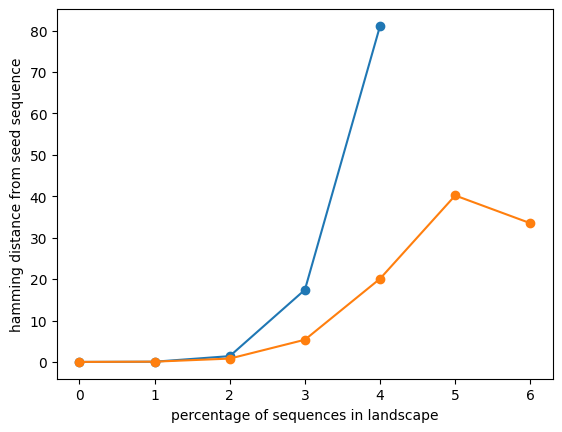

In [10]:
plt.plot(dists_gb1_prct, marker='o')
plt.plot(dists_nk_prct, marker='o')
plt.xlabel("percentage of sequences in landscape")
plt.ylabel("hamming distance from seed sequence")

In [18]:
with open('../results/ablation_results_GB1.pkl', 'rb') as file: 
    abl_results_gb1 = pickle.load(file)

abl_pearson_results_gb1 = np.zeros((8,1,4,5))
abl_mse_results_gb1 = np.zeros((8,1,4,5))
abl_r2_results_gb1 = np.zeros((8,1,4,5))
for model_index, model in enumerate(models): 
    for k_index, k_value in enumerate(abl_results_gb1[model].keys()):         
        for repl_index, replicate in enumerate(abl_results_gb1[model][k_value].keys()): 
            for density_ind, density in enumerate(abl_results_gb1[model][k_value][replicate].keys()): 
                abl_pearson_results_gb1[model_index][k_index][repl_index][density_ind] = abl_results_gb1[model]['gb1'][replicate][density][0]['test']['pearson_r']
                

KeyError: 0

In [17]:
abl_results_gb1['blstm']['gb1']['r0']['1.0'][0]

{'train': {'pearson_r': 0.9966067341593677,
  'r2': np.float64(0.9932178886422229),
  'mse_loss': 0.00108751637754583},
 'test': {'pearson_r': 0.9833173268067138,
  'r2': np.float64(0.9667445938176003),
  'mse_loss': 0.004990546141440669}}